Sohaib Nasir  
2021609  
CE442L Assignment  
Lab 06 Cubic Spline

In [44]:
import matplotlib.pyplot as plt
import numpy as np


In [45]:
def natural_cubic_spline(x, a):
    n = len(x) - 1
    h = np.diff(x)  # Calculate hi = xi+1 - xi

    # Step 2: Compute alpha values
    alpha = np.zeros(n)
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (a[i+1] - a[i]) - (3/h[i-1]) * (a[i] - a[i-1])

    # Step 3: Initialize l, mu, and z arrays
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    c = np.zeros(n + 1)
    b = np.zeros(n)
    d = np.zeros(n)

    # Step 4: Forward pass to solve tridiagonal system
    for i in range(1, n):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    # Step 5: Boundary conditions for natural spline
    l[n] = 1
    z[n] = 0
    c[n] = 0

    # Step 6: Back substitution to solve for c, b, d
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])

    return a[:-1], b, c[:-1], d

In [46]:
def clamped_cubic_spline(x, a, FPO, FPN):
    n = len(x) - 1
    h = np.diff(x)  # Calculate hi = xi+1 - xi

    # Step 2: Compute alpha values
    alpha = np.zeros(n + 1)
    alpha[0] = (3 / h[0]) * (a[1] - a[0]) - 3 * FPO  # Using FPO for first derivative
    alpha[n] = 3 * FPN - (3 / h[n-1]) * (a[n] - a[n-1])  # Using FPN for last derivative

    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

    # Step 3: Initialize l, mu, and z arrays
    l = np.zeros(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    c = np.zeros(n + 1)
    b = np.zeros(n)
    d = np.zeros(n)

    l[0] = 2 * h[0]
    mu[0] = 0.5
    z[0] = alpha[0] / l[0]

    # Step 5: Forward pass to solve tridiagonal system
    for i in range(1, n):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    l[n] = h[n-1] * (2 - mu[n-1])
    z[n] = (alpha[n] - h[n-1] * z[n-1]) / l[n]
    c[n] = z[n]

    # Step 6: Back substitution to solve for c, b, d
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])

    return a[:-1], b, c[:-1], d

In [47]:
def evaluate_spline(x_vals, a, b, c, d, x_points):
    """Evaluates the cubic spline for all sub-intervals."""
    n = len(x_vals) - 1
    spline_x = np.array([])
    spline_y = np.array([])
    
    for i in range(n):
        x_range = np.linspace(x_vals[i], x_vals[i+1], 100)
        spline_x = np.append(spline_x, x_range)
        spline_y = np.append(
            spline_y,
            a[i] + b[i] * (x_range - x_vals[i]) +
            c[i] * (x_range - x_vals[i]) ** 2 +
            d[i] * (x_range - x_vals[i]) ** 3
        )
    return spline_x, spline_y


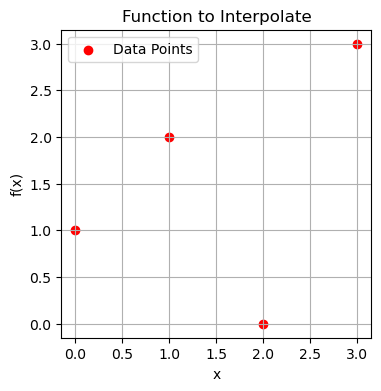

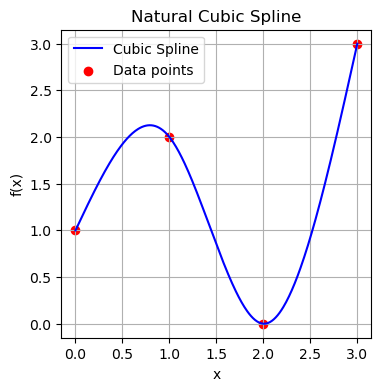

In [48]:
x = [0, 1, 2, 3]  
a = [1, 2, 0, 3]  # f(x) 
FPO = 0  # Derivative at x0
FPN = 0  # Derivative at xn

a_vals, b_vals, c_vals, d_vals = natural_cubic_spline(x, a)
# Evaluate the spline over the intervals
spline_x, spline_y = evaluate_spline(x, a_vals, b_vals, c_vals, d_vals, x)

plt.figure(figsize=(4, 4))
plt.scatter(x, a, label='Data Points', color='r')
plt.title('Function to Interpolate')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(4, 4))
plt.plot(spline_x, spline_y, label='Cubic Spline', color='b')
plt.scatter(x, a, color='r', label='Data points')  # Original data points
plt.title('Natural Cubic Spline')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


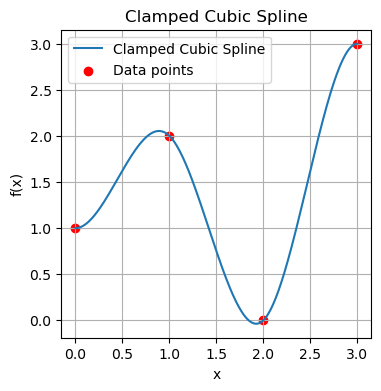

In [49]:
a_vals, b_vals, c_vals, d_vals = clamped_cubic_spline(x, a, FPO, FPN)
spline_x, spline_y = evaluate_spline(x, a_vals, b_vals, c_vals, d_vals, x)

plt.figure(figsize=(4, 4))
plt.plot(spline_x, spline_y, label='Clamped Cubic Spline')
plt.scatter(x, a, color='r', label='Data points')
plt.title('Clamped Cubic Spline')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
